<a href="https://colab.research.google.com/github/AN-Akhand/Transaction-Data-Clustering-with-NLP/blob/main/nlp_clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from collections import Counter
import seaborn as sns
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')
nltk.download('words')
valid_words = list(set(nltk.corpus.words.words()))
valid_words.extend(['eftn', 'ft', 'bkash', 'nogod', 'rtgs', 'pos', 'cib', 
                    'paywell', 'challan', 'npsb', 'fdr', 'dps', 'rd', 'fvg',
                    'sme', 'atm', 'trf', 'sonod'])
valid_words = set(valid_words)
stopwords = stopwords.words('english')
stopwords.extend(['no', 'c', 'cash', 'month', 'cap', 'smart', 'branch', 'month', 
                  'title', 'amount', 'purpose', 'please', 'pls', 'plz', 'begum',
                  'palli', 'pally', 'bidyut', 'wrongly', 'inter', 'post', 'amt'
                  , 'salary', 'global'])
w_tokenizer = nltk.tokenize.WhitespaceTokenizer()
lemmatizer = nltk.stem.WordNetLemmatizer()
def lemmatize_text(text):
  return set([lemmatizer.lemmatize(w, 'v') for w in w_tokenizer.tokenize(text)])

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Unzipping corpora/words.zip.


In [ ]:
import spacy
nlp = spacy.load("en_core_web_sm")
import en_core_web_sm
nlp = en_core_web_sm.load()
imp_words = ['eftn', 'ft', 'bkash', 'nogod', 'rtgs', 'pos', 'cib', 'paywell',
             'challan', 'npsb', 'cheque', 'deposit', 'fund', 'transfer', 
             'credit', 'debit', 'withdraw', 'atm', 'card', 'recharge', 'top', 
             'up', 'wallet', 'fdr', 'interest', 'loan', 'dps', 'rd', 'app',
             'agent', 'trf', 'sonod', 'foreign', 'exchange', 'installement', 
             'insurance', 'micro', 'merchant', 'remittance','salary', 'rent', 
             'sme','regular', 'bank']
ents = set()
def extract_ents(text):
  doc = nlp(text)
  for ent in doc.ents:
    ents.add(ent.text)

In [ ]:
import string
from plotly import tools
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import matplotlib.pyplot as plt

In [ ]:
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel
from pprint import pprint

In [ ]:
import json

In [ ]:
def create_corpus(data):
    corpus=[]
    
    for x in data:
      corpus.extend(x.split(' '))
    return corpus

In [ ]:
def plot_word_freq(data, num):
  corpus = create_corpus(data)
  corpus = [x for x in corpus if x != '']
  counter=Counter(corpus)
  most=counter.most_common()
  x=[]
  y=[]
  for word,count in most[:num]:
    x.append(word)
    y.append(count)
  sns.barplot(x=y,y=x)

In [ ]:
def cluster_word_freq(data, i, num):
  corpus = create_corpus(data[data['clusters'] == i]['clean'])
  corpus = [x for x in corpus if x != '']
  counter=Counter(corpus)
  most=counter.most_common()
  x=[]
  y=[]
  for word,count in most[:num]:
    x.append(word)
    y.append(count)
  sns.barplot(x=y,y=x)

In [ ]:
import re

In [ ]:
def get_word_freq(word, data):
  counter = 0
  for text in data:
    if re.search(r'\b' + word + r'\b', text):
      counter+=1
  return (word,counter)

In [ ]:
data_complete = pd.read_csv("/content/drive/MyDrive/Transaction_Naration_Data_Set.csv")

In [ ]:
data = data_complete.drop_duplicates(subset=['NARATION'])

In [ ]:
data

In [ ]:
len(data),data.index.shape[-1]

In [ ]:
data.loc[:,'NARATION']=data['NARATION'].str.lower()
data.loc[:,'NARATION'] = data.loc[:,'NARATION'].str.replace('withdrawal', 'withdraw')
data.loc[:,'NARATION'] = data.loc[:,'NARATION'].str.replace('saving ', 'savings ')
data.loc[:,'NARATION'] = data.loc[:,'NARATION'].str.replace(r'\btrf\b', 'transfer')
data.loc[:,'NARATION'] = data.loc[:,'NARATION'].str.replace('withdraw against inter branch cash deposit', 'withdraw against inter branch cash')
data.loc[:,'NARATION'] = data.loc[:,'NARATION'].str.replace('withdraw against cash deposit', 'withdraw against cash')
data.loc[:,'NARATION'] = data.loc[:,'NARATION'].str.replace('withdraw against deposit', 'withdraw against')
data.loc[:,'NARATION'] = data.loc[:,'NARATION'].str.replace(r'\bft\b', '')
data.loc[:,'NARATION'] = data.loc[:,'NARATION'].str.replace('[^A-Za-z]+', ' ', regex=True)
data.loc[:,'NARATION'] = data.loc[:,'NARATION'].replace(['^\s+$'], np.nan, regex = True)
data = data[data['NARATION'].notnull()]
data = data.drop_duplicates(subset=['NARATION'])
data.loc[:,'NARATION'] = data.loc[:,'NARATION'].str.replace('withdraw against inter branch cash deposit', 'withdraw against inter branch cash')
data.loc[:,'NARATION'] = data.loc[:,'NARATION'].str.replace('withdraw against cash deposit', 'withdraw against cash')
data.loc[:,'NARATION'] = data.loc[:,'NARATION'].str.replace('withdraw against deposit', 'withdraw against')
data = data.drop(data[data['NARATION'].str.contains('withdraw') & data['NARATION'].str.contains('deposit')].index)

In [ ]:
data.to_csv("/content/drive/MyDrive/Unique_And_Only_English_Data_Set.csv")

In [ ]:
data = pd.read_csv("/content/drive/MyDrive/Unique_And_Only_English_Data_Set.csv")

In [ ]:
data

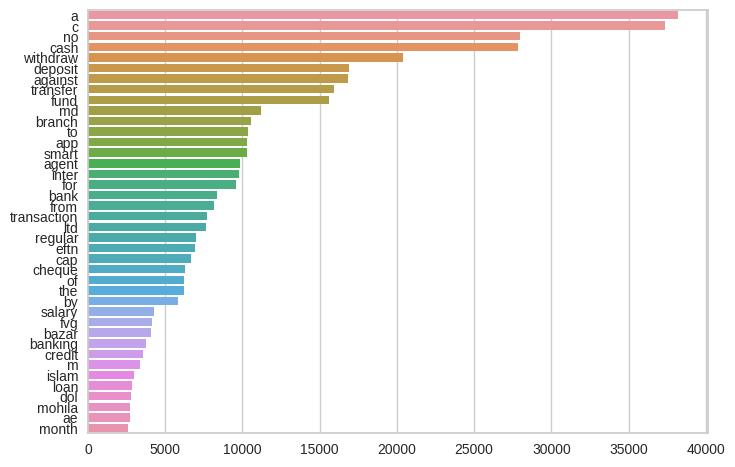

In [ ]:
plot_word_freq(data['NARATION'], 40)

In [ ]:
data.loc[:,'clean'] = data.loc[:,'NARATION'].apply(lambda words: ' '.join(word.lower() for word in words.split(' ') if word not in stopwords))
data['clean'] = data['clean'].replace(['^\s+$'], np.nan, regex = True)
data = data[data['clean'].notnull()]
data = data.drop_duplicates(subset=['clean'])

In [ ]:
data

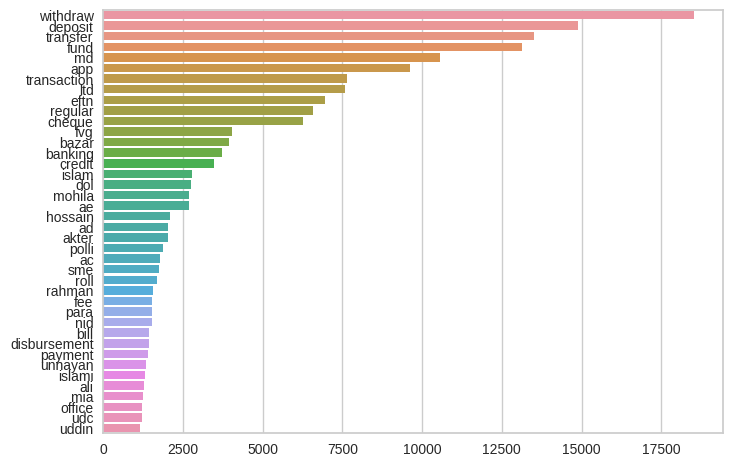

In [ ]:
plot_word_freq(data['clean'], 40)

In [ ]:
data.loc[:,'clean'] = data.loc[:,'clean'].apply(lambda words: ' '.join(word.lower() for word in words.split(' ') if word in valid_words))
data['clean'] = data['clean'].replace(['^\s+$'], np.nan, regex = True)
data = data[data['clean'].notnull()]
data = data.drop_duplicates(subset=['clean'])

In [ ]:
data

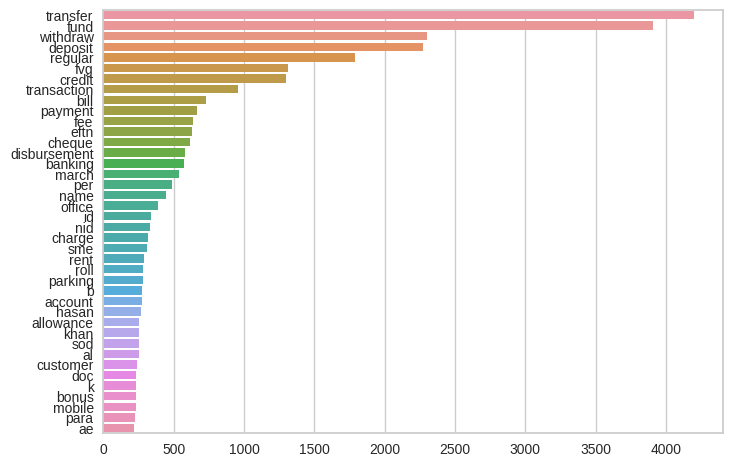

In [ ]:
plot_word_freq(data['clean'], 40)

In [ ]:
data['clean'].apply(extract_ents)

In [ ]:
ents

In [ ]:
temp = set()
for text in ents:
  temp.update(text.split(' '))

In [ ]:
ents = temp

In [ ]:
for word in imp_words:
  if word in ents:
    ents.remove(word)

In [ ]:
ents

In [ ]:
len(ents)

In [ ]:
with open("/content/drive/MyDrive/ents.json", 'w') as outfile:
    json.dump(list(ents), outfile)

In [ ]:
with open("/content/drive/MyDrive/ents.json", 'r') as infile:
    test = json.load(infile)

In [ ]:
test

In [ ]:
data.loc[:,'clean'] = data.loc[:,'clean'].apply(lambda words: ' '.join(word.lower() for word in words.split(' ') if word not in ents))
data['clean'] = data['clean'].replace(['^\s+$'], np.nan, regex = True)
data = data[data['clean'].notnull()]
#data = data.drop_duplicates(subset=['clean'])

In [ ]:
data

In [ ]:
plot_word_freq(data['clean'], 30)

In [ ]:
data['lem_tok'] = data['clean'].apply(lemmatize_text)

In [ ]:
len(data)

In [ ]:
data.to_csv("/content/drive/MyDrive/Tokenized_Data_Set.csv")

In [ ]:
data

In [ ]:
x = []
y = []
for i in range(15):  
  id2word = corpora.Dictionary(data['lem_tok'])
  texts = data['lem_tok']
  corpus = [id2word.doc2bow(text) for text in texts]
  [[(id2word[id], freq) for id, freq in cp] for cp in corpus]
  lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                             id2word=id2word,
                                             num_topics=i + 1, 
                                             random_state=123,
                                             update_every=1,
                                             chunksize=100,
                                             passes=8,
                                             alpha='auto',
                                             per_word_topics=True)
  doc_lda = lda_model[corpus]
  coherence_model_lda = CoherenceModel(model=lda_model, texts=data['lem_tok'], dictionary=id2word, coherence='c_v')
  coherence_lda = coherence_model_lda.get_coherence()
  x.append(i+1)
  y.append(coherence_lda)
  print('\nNo of clusters: ', i + 1)
  print('\nCoherence Score: ', coherence_lda)


No of clusters:  1

Coherence Score:  0.4207056406021435

No of clusters:  2

Coherence Score:  0.44000390945860623

No of clusters:  3

Coherence Score:  0.5224515096580161

No of clusters:  4

Coherence Score:  0.5788007222256035

No of clusters:  5

Coherence Score:  0.5934629227468042

No of clusters:  6

Coherence Score:  0.6140346857235688

No of clusters:  7

Coherence Score:  0.6353365067896567

No of clusters:  8

Coherence Score:  0.6202575299381026

No of clusters:  9

Coherence Score:  0.6248774265256347

No of clusters:  10

Coherence Score:  0.6167019776935135

No of clusters:  11

Coherence Score:  0.6080768099001993

No of clusters:  12

Coherence Score:  0.6093401497016815

No of clusters:  13

Coherence Score:  0.5745660790130098

No of clusters:  14

Coherence Score:  0.5731088860903516

No of clusters:  15

Coherence Score:  0.5565774218949926


In [ ]:
id2word = corpora.Dictionary(data['lem_tok'])
texts = data['lem_tok']
corpus = [id2word.doc2bow(text) for text in texts]
[[(id2word[id], freq) for id, freq in cp] for cp in corpus]
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                             id2word=id2word,
                                             num_topics=7, 
                                             random_state=123,
                                             update_every=1,
                                             chunksize=100,
                                             passes=8,
                                             alpha='auto',
                                             per_word_topics=True)
pprint(lda_model.print_topics())

[(0,
  '0.209*"credit" + 0.104*"sme" + 0.036*"market" + 0.026*"corporate" + '
  '0.025*"eftn" + 0.023*"relationship" + 0.020*"make" + 0.017*"paywell" + '
  '0.015*"pos" + 0.012*"hat"'),
 (1,
  '0.403*"deposit" + 0.024*"team" + 0.023*"land" + 0.022*"instead" + '
  '0.017*"food" + 0.016*"spin" + 0.012*"compensation" + 0.009*"number" + '
  '0.009*"shab" + 0.009*"babul"'),
 (2,
  '0.086*"cheque" + 0.059*"atm" + 0.037*"cib" + 0.033*"ae" + 0.032*"financial" '
  '+ 0.026*"literacy" + 0.025*"link" + 0.025*"need" + 0.023*"adjust" + '
  '0.022*"device"'),
 (3,
  '0.077*"card" + 0.059*"close" + 0.038*"letter" + 0.034*"regard" + '
  '0.024*"officer" + 0.024*"instruction" + 0.024*"booth" + 0.023*"meet" + '
  '0.021*"excess" + 0.020*"life"'),
 (4,
  '0.241*"transfer" + 0.229*"fund" + 0.119*"regular" + 0.016*"festival" + '
  '0.015*"rent" + 0.014*"send" + 0.012*"balance" + 0.010*"family" + '
  '0.009*"dps" + 0.008*"paper"'),
 (5,
  '0.049*"voucher" + 0.039*"cost" + 0.038*"print" + 0.038*"anniversary"

In [ ]:
def format_topics_sentences(ldamodel, corpus, texts):
    # Init output
    sent_topics_df = pd.DataFrame()

    # Get main topic in each document
    for i, row in enumerate(ldamodel[corpus]):
        row = sorted(row[0], key=lambda x: (x[1]), reverse=True)
        # Get the Dominant topic, Perc Contribution and Keywords for each document
        for j, (topic_num, prop_topic) in enumerate(row):
            if j == 0:  # => dominant topic
                wp = ldamodel.show_topic(topic_num)
                topic_keywords = ", ".join([word for word, prop in wp])
                sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
            else:
                break
    sent_topics_df.columns = ['Dominant_Topic', 'Perc_Contribution', 'Topic_Keywords']

    # Add original text to the end of the output
    contents = texts
    sent_topics_df = pd.concat([sent_topics_df, contents], axis=1)
    return(sent_topics_df)
testtest = format_topics_sentences(lda_model, corpus, data['clean'])

In [ ]:
testtest

,Dominant_Topic,Perc_Contribution,Topic_Keywords,clean
0,6.0,0.4114,"withdraw, insurance, issue, debit, wrong, furn...",withdraw
1,6.0,0.4461,"withdraw, insurance, issue, debit, wrong, furn...",NaN
2,6.0,0.2505,"withdraw, insurance, issue, debit, wrong, furn...",withdraw micro merchant
3,1.0,0.4056,"deposit, team, land, instead, food, spin, comp...",credit merchant withdraw
4,6.0,0.2504,"withdraw, insurance, issue, debit, wrong, furn...",NaN
...,...,...,...,...
22322364,NaN,NaN,NaN,deposit deposit sme
22330918,NaN,NaN,NaN,corporate approval printing banner regarding f...
22332238,NaN,NaN,NaN,corporate approval entertainment expense arran...
22403205,NaN,NaN,NaN,regular fund transfer job


In [ ]:
testtest.to_csv("/content/drive/MyDrive/testtest.csv")

In [ ]:
from gensim.models import Word2Vec
gensim_model = Word2Vec(sentences=data['lem_tok'], workers=1, seed=42)

In [ ]:
def vectorize(list_of_docs, model):
    features = []

    for tokens in list_of_docs:
        zero_vector = np.zeros(model.vector_size)
        vectors = []
        for token in tokens:
            if token in model.wv:
                try:
                    vectors.append(model.wv[token])
                except KeyError:
                    continue
        if vectors:
            vectors = np.asarray(vectors)
            avg_vec = vectors.mean(axis=0)
            features.append(avg_vec)
        else:
            features.append(zero_vector)
    return features

data['vect'] = vectorize(data['lem_tok'], model=gensim_model)

In [ ]:
def vectorize_single(text, model):
      zero_vector = np.zeros(model.vector_size)
      vectors = []
      for token in text:
          if token in model.wv:
              try:
                  vectors.append(model.wv[token])
              except KeyError:
                  continue
      if vectors:
          vectors = np.asarray(vectors)
          avg_vec = vectors.mean(axis=0)
          return avg_vec
      else:
          return zero_vector

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score, davies_bouldin_score
from sklearn.preprocessing import scale

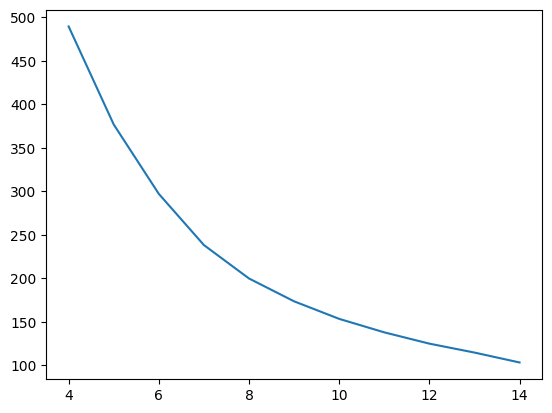

In [ ]:
wcss = []

for i in range(4,15):
    kmeans = KMeans(n_clusters=i,init='k-means++',max_iter=300,n_init=10,random_state=42)
    kmeans.fit(list(data['vect']))
    wcss.append(kmeans.inertia_)

plt.plot(range(4,15),wcss)
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will chang

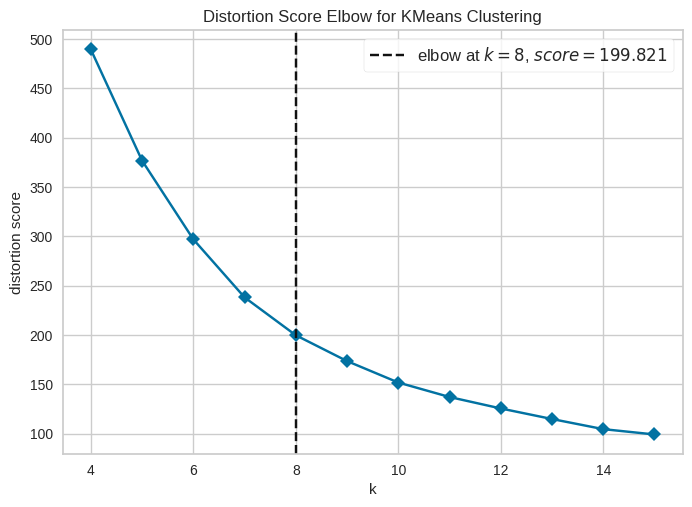

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [ ]:
from yellowbrick.cluster import KElbowVisualizer
model = KMeans()
visualizer = KElbowVisualizer(model, k=(4,16), timings= False)
visualizer.fit(np.array(list(data['vect'])))        # Fit data to visualizer
visualizer.show() 

In [ ]:
cluster_size = 8
kmeans = KMeans(n_clusters=cluster_size, n_init=10,random_state=123)
kmeans.fit(list(data['vect']))

KMeans(n_init=10, random_state=123)

In [ ]:
temp_data=data

In [ ]:
data['clusters'] = kmeans.labels_

In [ ]:
data

In [ ]:
data.to_csv("/content/drive/MyDrive/test_res.csv")

In [ ]:
data[data['clusters'] == 2]

In [ ]:
cluster_word_freq(data, 6, 30)

8283 ['bank', 'agent', 'deposit', 'loan'] [821, 775, 536, 528, 507, 479]
989 ['resort', 'contribution', 'nourish'] []
6791 ['deposit', 'withdraw', 'agent', 'credit'] [1541, 1464, 611, 445]
8002 ['transfer', 'fund'] [866, 823]
9585 ['transfer', 'fund', 'regular'] [2943, 2847, 1453]
1964 ['credit'] [470]
1264 ['tuition'] [73]


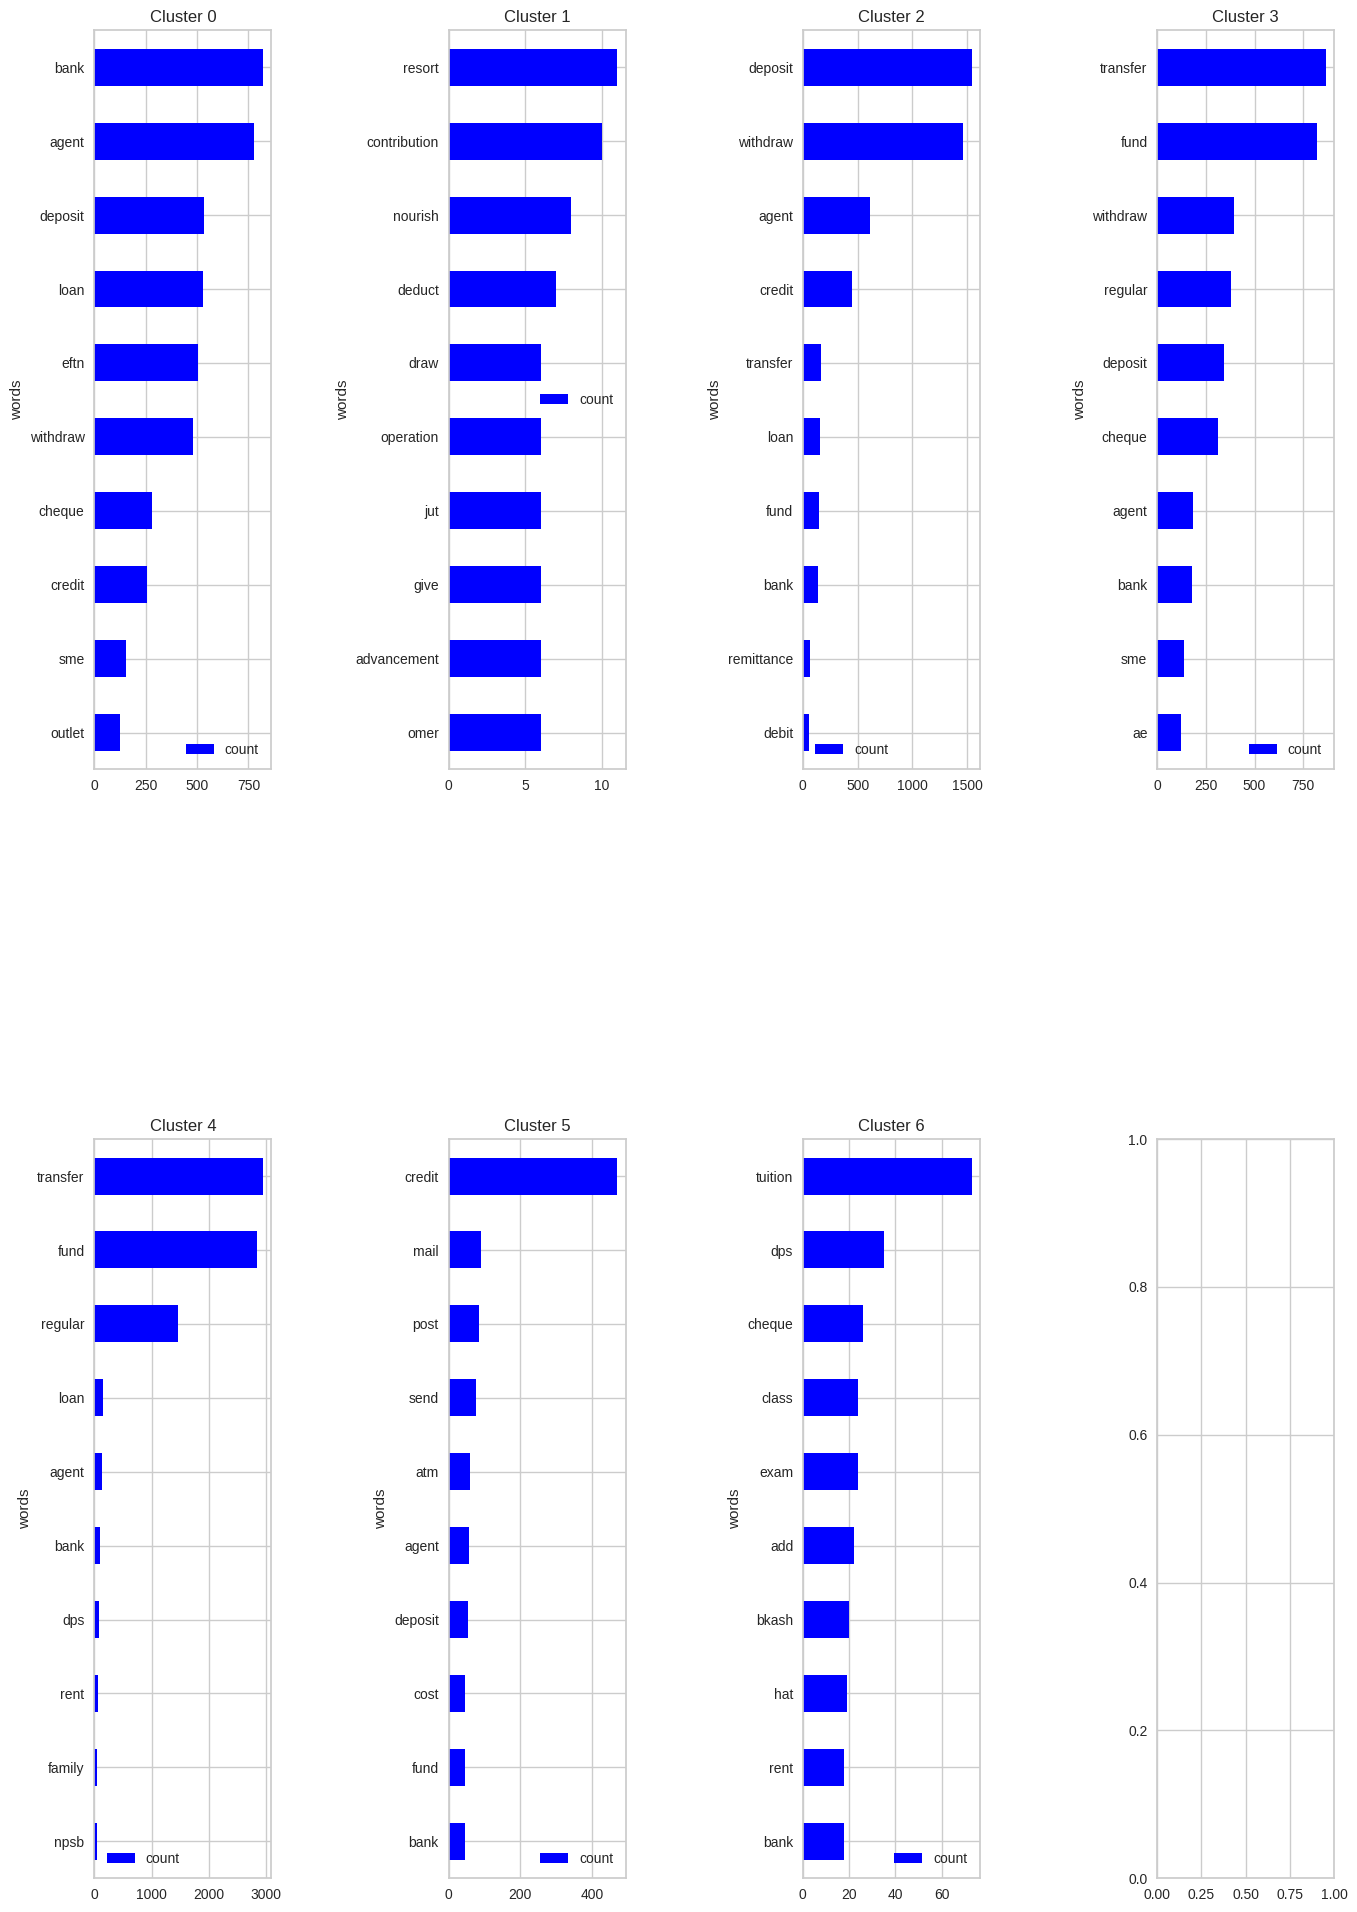

In [ ]:
import itertools
import collections
import matplotlib.pyplot as plt

most_freq_words_kmeans = [[] for _ in range(7)]

def perClusterPlot(arr,ax,title,clusterNo):
  lemmatized_tokens = list(arr['lem_tok'])
  token_list = list(itertools.chain(*lemmatized_tokens))
  counts_no = collections.Counter(token_list)
  clean_tweets = pd.DataFrame(counts_no.most_common (10), columns=['words', 'count'])
  clean_tweets.sort_values(by='count').plot.barh(x='words',y='count',ax=ax,color='blue', title=title)
  s = sum(counts_no.values())
  vals = [x[1] for x in counts_no.most_common (10) if (x[1] / s * 100.0) > 5.0]
  if len(vals) == 0:
    keys = [x[0] for x in counts_no.most_common (3)]
  elif len(vals) > 4:
    keys = [x[0] for x in counts_no.most_common (4)]
  else:
    keys = [x[0] for x in counts_no.most_common (len(vals))]
  print(s, keys, vals)
  most_freq_words_kmeans[clusterNo].append(keys)


fig, ax = plt.subplots(nrows=int(7 / 4 + 1), ncols=4, figsize=(16, 24))
plt.subplots_adjust(wspace=1, hspace=0.5)
axe = ax.ravel()
for i in range(7):
   perClusterPlot(data[data['clusters'] == i], axe[i], "Cluster " + str(i), i)

plt.show()

In [ ]:
from joblib import dump, load

In [ ]:
dump(kmeans, "/content/drive/MyDrive/kmeans.model")
dump(gensim_model, "/content/drive/MyDrive/vect_model.model")

In [ ]:
def load_reqs():
  kmeans_model = load("/content/drive/MyDrive/kmeans.model")
  vect_model = load("/content/drive/MyDrive/vect_model.model")
  return (kmeans_model, vect_model)
def predict(text, model, vect_model):
  text = text.lower()
  text = text.replace(r'[^A-Za-z]+', ' ')
  text = text.replace('withdrawal', 'withdraw')
  text = text.replace('withdraw against inter branch cash deposit', 'withdraw against inter branch cash')
  text = text.replace('withdraw against cash deposit', 'withdraw against cash')
  text = text.replace('withdraw against deposit', 'withdraw against')
  lem_tok = lemmatize_text(text)
  vect = vectorize_single(lem_tok, vect_model)
  return model.predict([vect])

In [ ]:
(model, vect_model) = load_reqs()
predict('fund transfer', model, vect_model)

In [ ]:
!pip freeze > requirements.txt

In [ ]:
!python test.py "withdraw cash"

cluster  [2]
